In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
dataset=pd.read_csv('kc_house_data.csv')

In [3]:
df=pd.DataFrame(dataset)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [9]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
import seaborn as sns

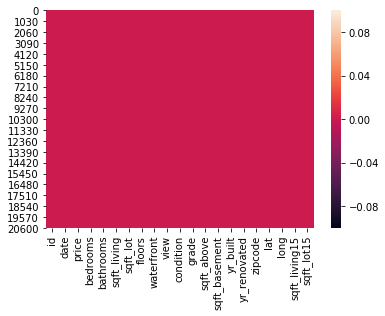

In [11]:
sns.heatmap(df.isna())

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


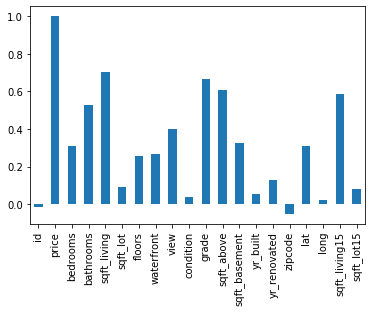

In [14]:
df.corr()['price'].plot(kind  =  'bar')

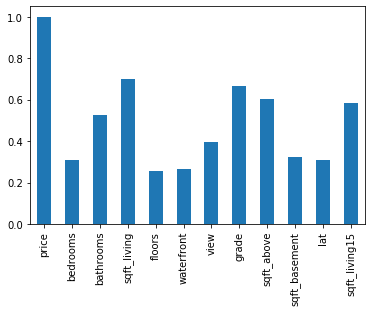

In [15]:
corr_df = df.corr()['price']
corr_df = corr_df.iloc[corr_df.values > 0.25]
corr_df.plot(kind = 'bar')

In [16]:
corr_df.index

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [17]:
for i in df.columns.values:
    if i not in corr_df.index and i != 'Id':
        df.drop(i,axis=1,inplace=True)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


In [19]:
df.shape

(21613, 12)

## Feature selection

### Lets defind feature sets, x and y:

In [20]:
y=df['price']

In [21]:
x=df.iloc[:,1:12]

In [22]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


In [23]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x=SC.fit_transform(x)

In [24]:
x[0:5]

array([[-0.39873715, -1.44746357, -0.97983502, -0.915427  , -0.08717263,
        -0.30575946, -0.55883575, -0.73470764, -0.65868104, -0.35257175,
        -0.9433552 ],
       [-0.39873715,  0.1756067 ,  0.53363434,  0.93650577, -0.08717263,
        -0.30575946, -0.55883575,  0.46084084,  0.2451414 ,  1.16156823,
        -0.43268619],
       [-1.47395936, -1.44746357, -1.42625404, -0.915427  , -0.08717263,
        -0.30575946, -1.40958711, -1.22983377, -0.65868104,  1.28353661,
         1.07013975],
       [ 0.67648506,  1.14944885, -0.13055006, -0.915427  , -0.08717263,
        -0.30575946, -0.55883575, -0.89169885,  1.39751501, -0.28328794,
        -0.91417411],
       [-0.39873715, -0.14900736, -0.43542158, -0.915427  , -0.08717263,
        -0.30575946,  0.29191561, -0.13089528, -0.65868104,  0.40955019,
        -0.27219022]])

In [25]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 0)

# Linear Regression Model
## Multiple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [28]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('coefficient: ',LR.coef_)
print('intercept: ',LR.intercept_)

coefficient:  [-2.36016810e+04 -4.66330744e+03  3.14317022e+18 -1.52652146e+04
  5.45179989e+04  5.18865728e+04  9.41135559e+04 -2.83396668e+18
 -1.51461972e+18  9.34402470e+04  4.40308385e+03]
intercept:  538445.8377674957


In [30]:
y_hat= LR.predict(X_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LR.score(x, y))

from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_hat,y_test) )

from sklearn.metrics import mean_squared_error 
import math
mse = math.sqrt(mean_squared_error(y_hat,y_test)) 
print('Root mean square error', mse)


Residual sum of squares: 41400701704.42
Variance score: 0.66
R2-score: 0.51
Root mean square error 203471.623830995


# Polynomial Regression with degree '2'

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [32]:
from sklearn import metrics

In [33]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)
polypred=poly.predict(xtest_poly)

mean_squared_error=math.sqrt(metrics.mean_squared_error(y_test,polypred))
print('Root Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))

Root Mean Squared Error (MSE)  423.4
R-squared (training)  0.755
R-squared (testing)  0.73


# Polynomial Regression with degree '3'

In [34]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)
polypred=poly.predict(xtest_poly)

mean_squared_error=math.sqrt(metrics.mean_squared_error(y_test,polypred))
print('Root Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))

Root Mean Squared Error (MSE)  401.31
R-squared (training)  0.817
R-squared (testing)  0.782


# Observation
### Polynomial Regression with degree '3' gives us R-squared (testing) score of 0.782. From above reports, we can conclude that Polynomial regression for degree=3, is best solution.